In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,6.00,3


In [5]:
df2 = df1.copy(deep=True)
df2.loc[df2['WinMargin'] < 0, 'HTLoss'] = df2['HTLoss']-1
df2.loc[df2['WinMargin'] >= 0, 'HTWin'] = df2['HTWin']-1
df2.loc[df2['WinMargin'] < 0, 'ATWin'] = df2['ATWin']-1
df2.loc[df2['WinMargin'] >= 0, 'ATLoss'] = df2['ATLoss']-1
df2['HT%'] = df2['HTWin']/(df2['HTWin'] + df2['HTLoss'])
df2['AT%'] = df2['ATWin']/(df2['ATWin'] + df2['ATLoss'])
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,0.0,0.0,NaN,0.0,0.0,NaN,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,0.0,0.0,NaN,0.0,0.0,NaN,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,0.0,NaN,0.0,0.0,NaN,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,0.0,0.0,NaN,1.0,0.0,1.0,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,0.0,0.0,NaN,0.0,0.0,NaN,6,2,6,2,4,2006,11,44,2,6.00,3


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns.values
cols = np.delete(cols,np.where(cols=='average'))
cols

array(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin',
       'ATLoss', 'AT%', 'TopLine', 'TLCompany', 'BotLine', 'BLCompany',
       'NumComps', 'Year', 'Month', 'Week', 'Weekday', 'WinMargin'],
      dtype=object)

In [7]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
df2 = df2.fillna(0)
sc2 = StandardScaler()
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
sc3 = StandardScaler()
df2[['average']] = sc3.fit_transform(df2[['average']])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,-1.699521,1.340681,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,0.449801
1,-1.586928,-0.120367,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308,0.524906
2,-1.474335,0.891128,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,-0.301253
3,-1.361743,0.216798,-1.370366,-1.365599,-2.46882,-1.309350,-1.360148,2.487914,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711,0.900433
4,-1.249150,0.666351,-1.370366,-1.365599,-2.46882,-1.380817,-1.360148,-2.500181,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609,-0.000832


In [87]:
df3 = df2.copy(deep=True)
df3 = df3.drop(['TLCompany','BLCompany','NumComps'], axis=1)

In [91]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [15], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [15], axis=1)
test_x=tests[0]
test_y=tests[1]

In [92]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [93]:
train_y.head()

,WinMargin
0,0.449801
1,0.524906
2,-0.301253
3,0.900433
4,-0.000832


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


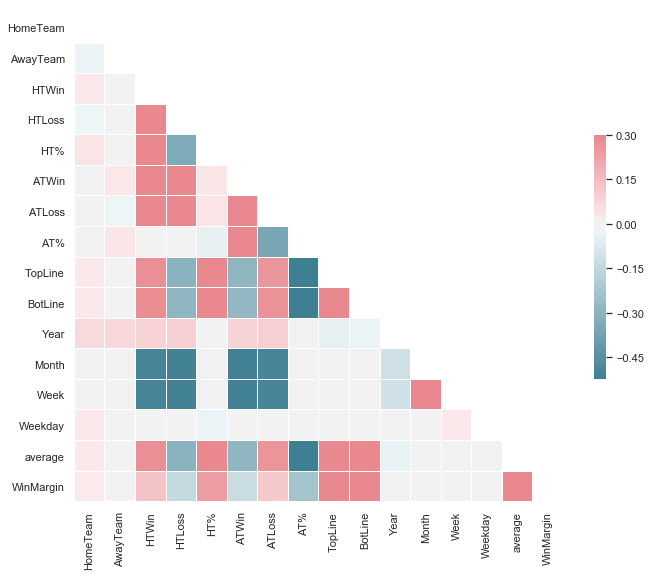

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[ 0.01201291,  0.00108466,  0.06154822,  0.03431728,  0.00144236,
        -0.05790184, -0.05483016,  0.0082708 ,  0.05639658, -0.20828684,
        -0.00488492, -0.06536692,  0.04068655,  0.00934564,  0.60855886]])

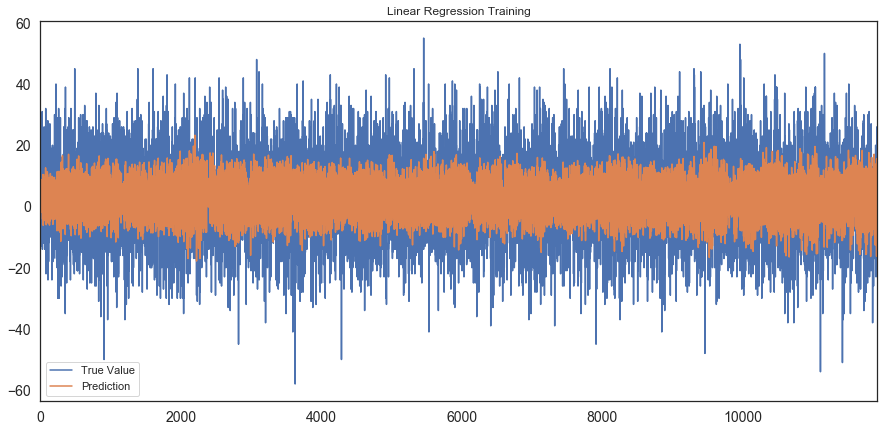

adj train r^2 = 0.2149910379441755
train mse = 136.33649352996653


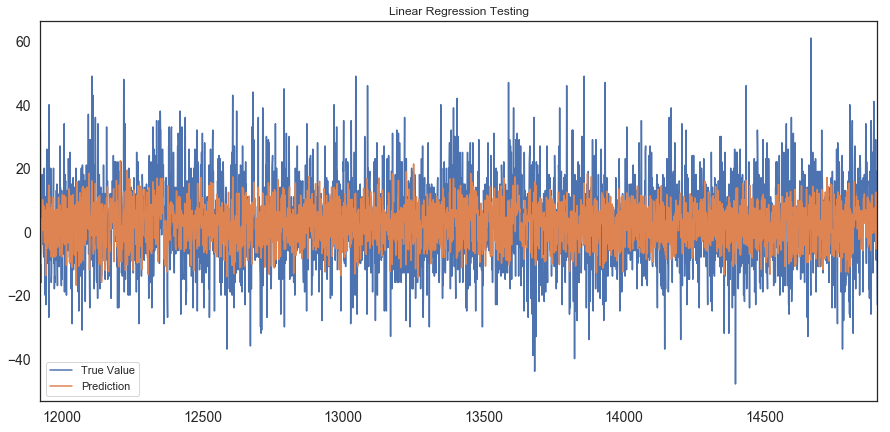

adj test r^2 = 0.20296326676248988
test mse = 151.89638759295687


In [96]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [97]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 51.4%
The testing accuracy is 50.08%


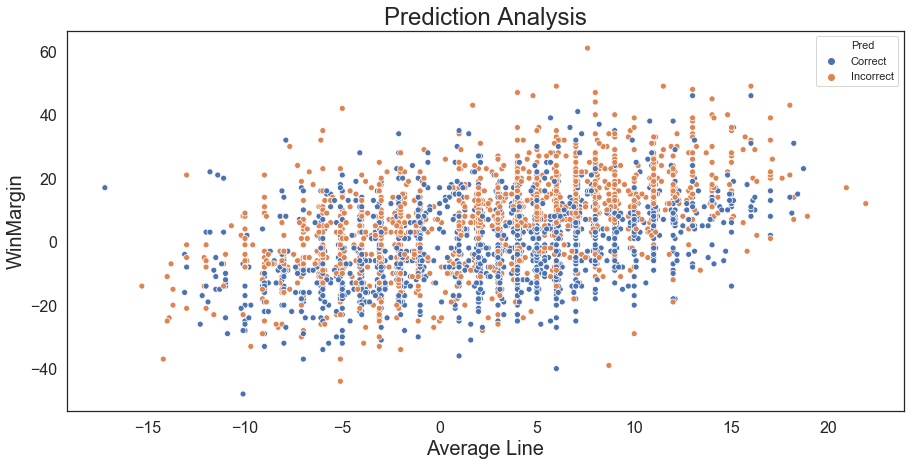

The testing accuracy is 50.08%


In [98]:
import seaborn as sns
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [99]:
end1 = test_y3['Pred'].values

## Naive Model

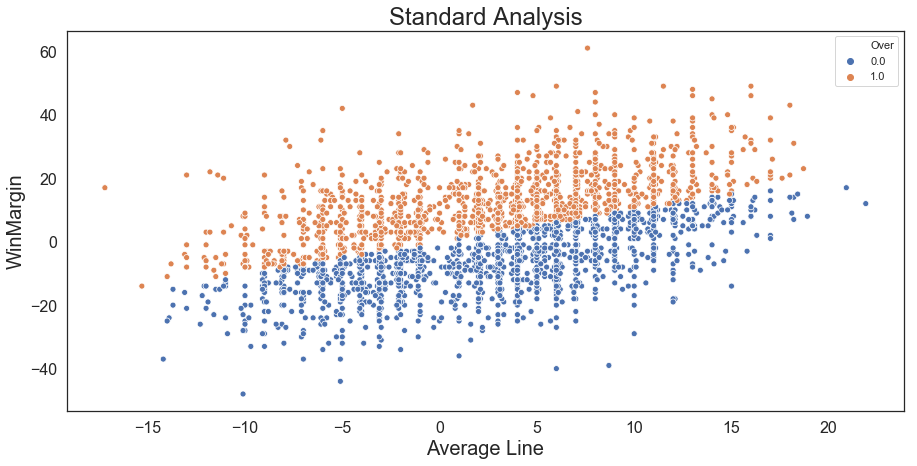

In [100]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Over", data=test_y3)
ax.set_title("Standard Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

In [101]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [102]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 48.98% of the time
Always picking under the line works 51.02% of the time


In [103]:
end2 = test_y3['Over'].values

## Extra Trees

In [149]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,max_depth=12)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=12,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

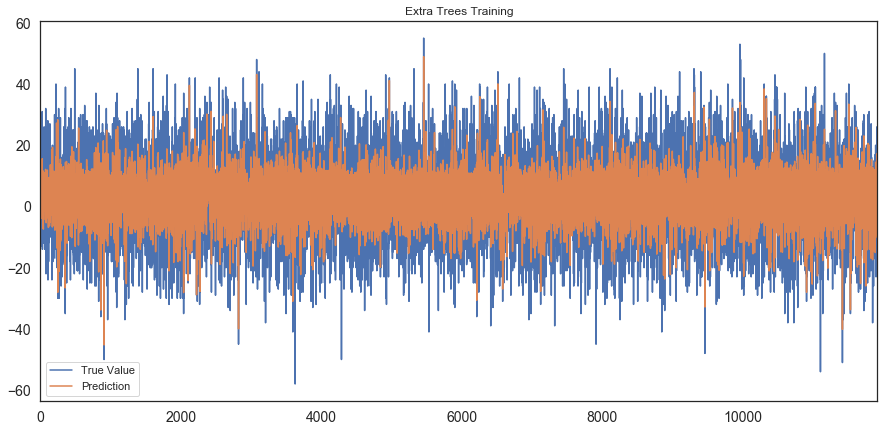

adj train r^2 = 0.5026051977292091
train mse = 86.38508159707898


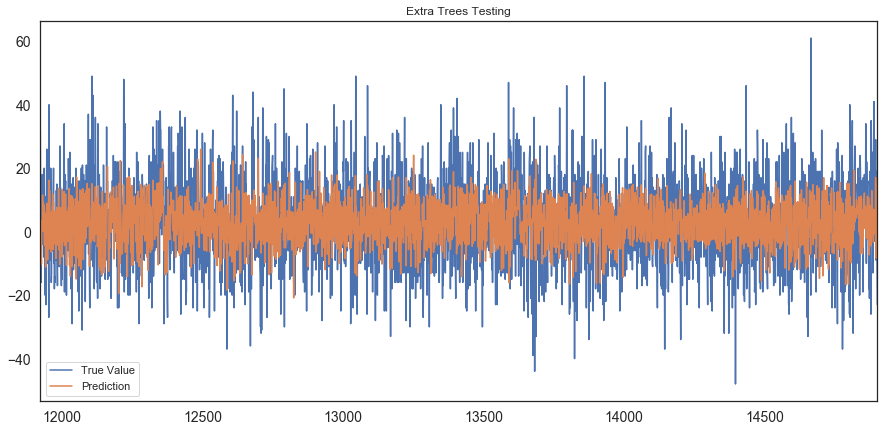

adj test r^2 = 0.18879922668517046
test mse = 154.59571929468103


In [150]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [151]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 81.04%
The testing accuracy is 49.51%


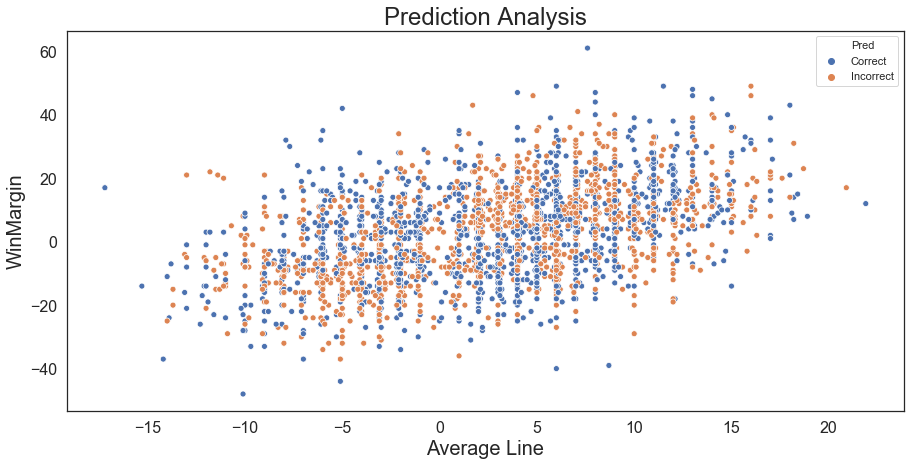

The testing accuracy is 49.75%


In [148]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [108]:
end3 = test_y3['Pred'].values

## Random Forrest

In [109]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

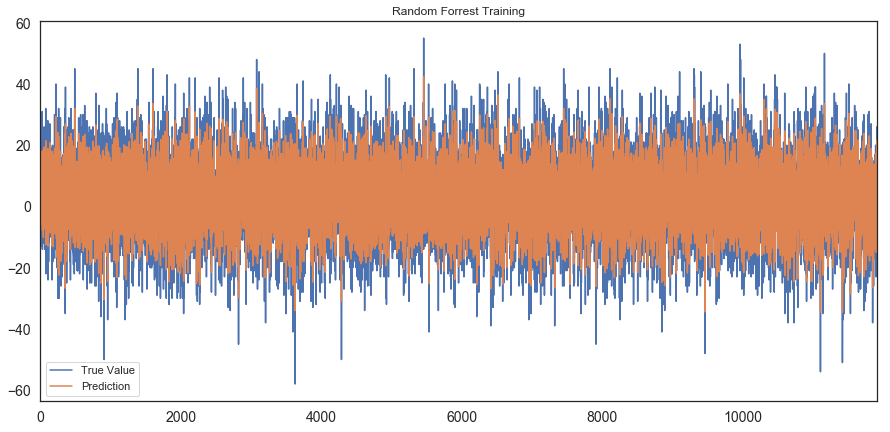

adj train r^2 = 0.8880049811862379
train mse = 19.45074374425438


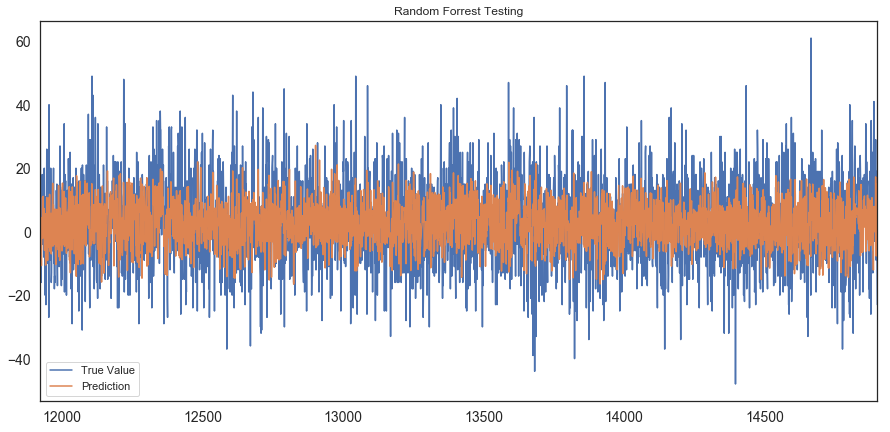

adj test r^2 = 0.16467534550309448
test mse = 159.1931616125461


In [110]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [111]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 95.36%
The testing accuracy is 48.98%


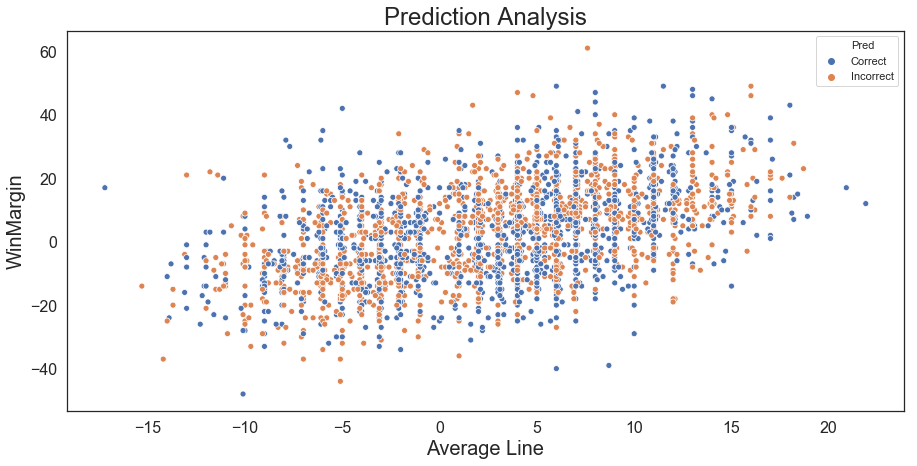

The testing accuracy is 48.98%


In [112]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [113]:
end4 = test_y3['Pred'].values

## XGBoost

In [114]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [115]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.6)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.6, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

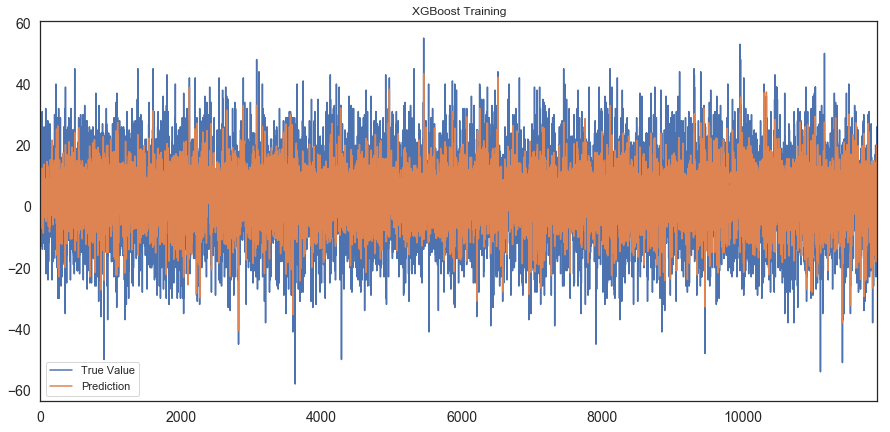

adj train r^2 = 0.5776614223157523
train mse = 73.3496858597762


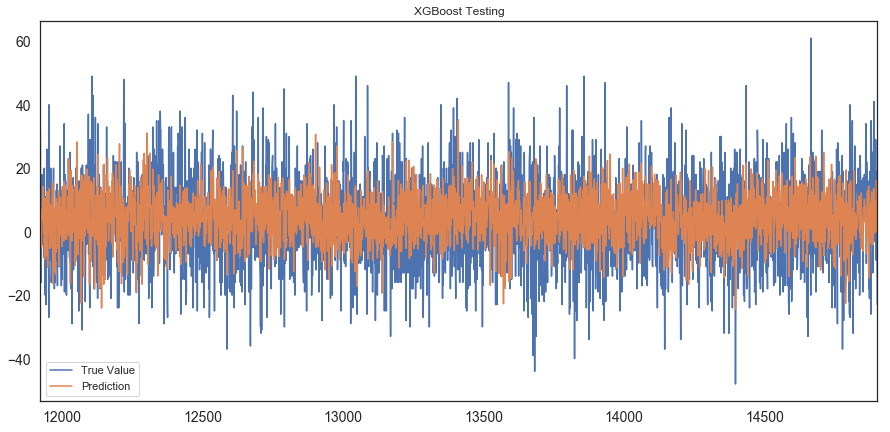

adj test r^2 = 0.06270284387942016
test mse = 178.6267133982169


In [116]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [117]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 77.82%
The testing accuracy is 49.78%


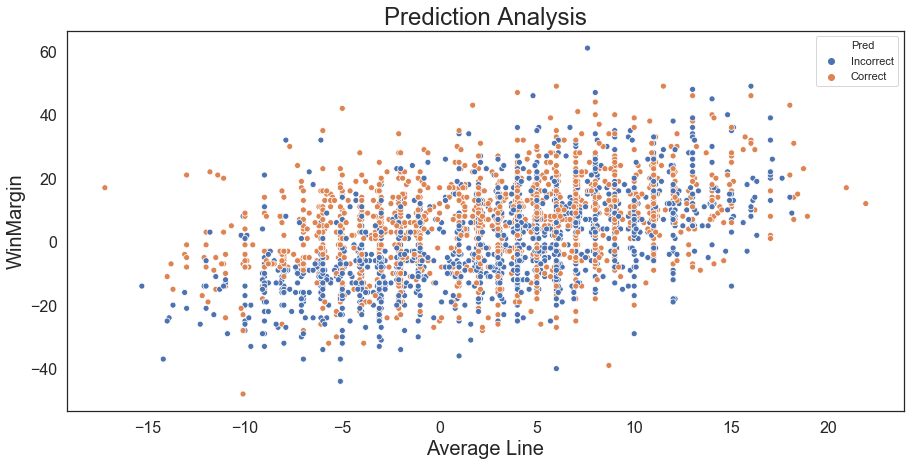

The testing accuracy is 49.78%


In [118]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [119]:
end5 = test_y3['Pred'].values

## Feed Forward Neural Network

In [120]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [125]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=15, activation='tanh'))
#Dropout(.2)
#model.add(Dense(34, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=100,verbose=0,shuffle=False)

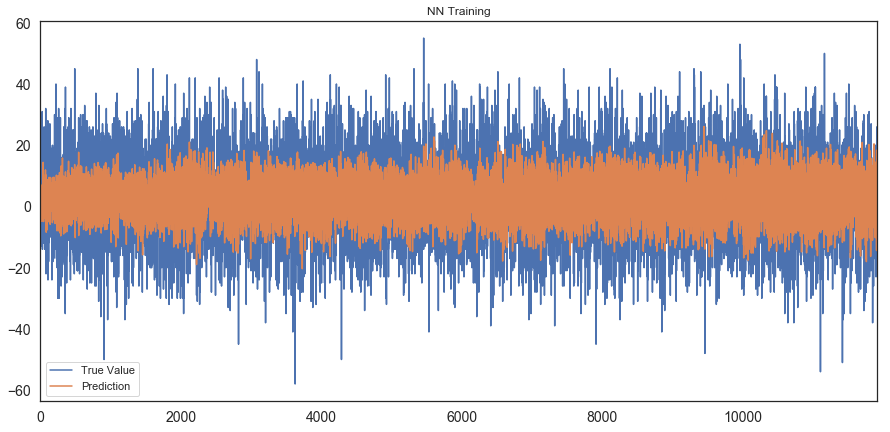

adj train r^2 = 0.24424463681723152
train mse = 131.2558724335656


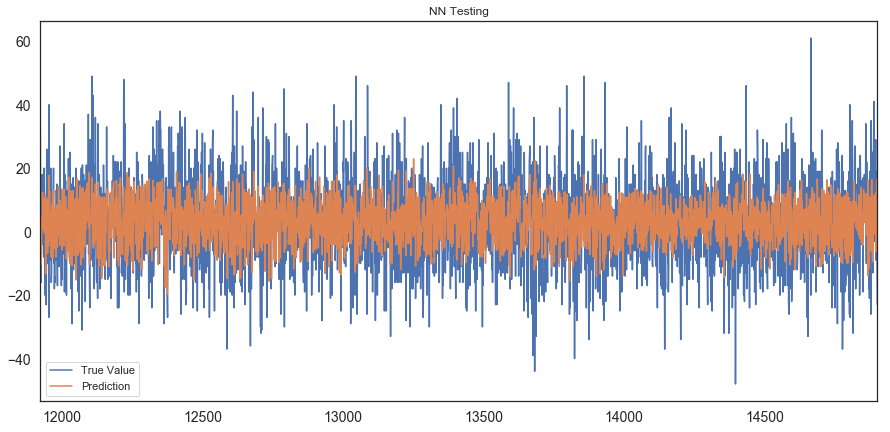

adj test r^2 = 0.1754628136143236
test mse = 157.13732482480592


In [126]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [127]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 55.97%
The testing accuracy is 50.35%


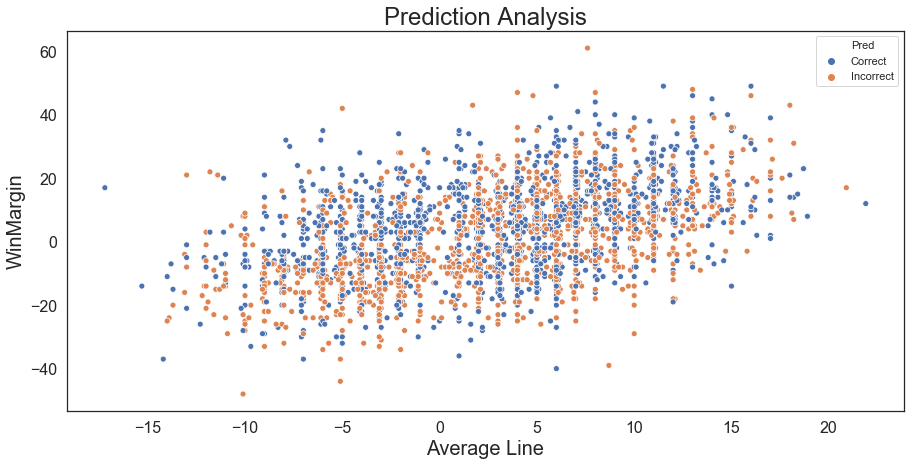

The testing accuracy is 50.35%


In [128]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [129]:
end6 = test_y3['Pred'].values

## LSTM

In [130]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [132]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(60, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=10, verbose=1, shuffle=False)

Train on 11922 samples, validate on 2981 samples
Epoch 1/10
11922/11922 [==============================] - 4s 367us/step - loss: 0.8244 - val_loss: 0.8715
Epoch 2/10
11922/11922 [==============================] - 2s 177us/step - loss: 0.7803 - val_loss: 0.8682
Epoch 3/10
11922/11922 [==============================] - 2s 177us/step - loss: 0.7768 - val_loss: 0.8673
Epoch 4/10
11922/11922 [==============================] - 2s 184us/step - loss: 0.7746 - val_loss: 0.8670
Epoch 5/10
11922/11922 [==============================] - 2s 178us/step - loss: 0.7730 - val_loss: 0.8669
Epoch 6/10
11922/11922 [==============================] - 2s 180us/step - loss: 0.7718 - val_loss: 0.8669
Epoch 7/10
11922/11922 [==============================] - 2s 177us/step - loss: 0.7708 - val_loss: 0.8670
Epoch 8/10
11922/11922 [==============================] - 2s 177us/step - loss: 0.7700 - val_loss: 0.8671
Epoch 9/10
11922/11922 [==============================] - 2s 179us/step - loss: 0.7694 - val_loss: 0.86

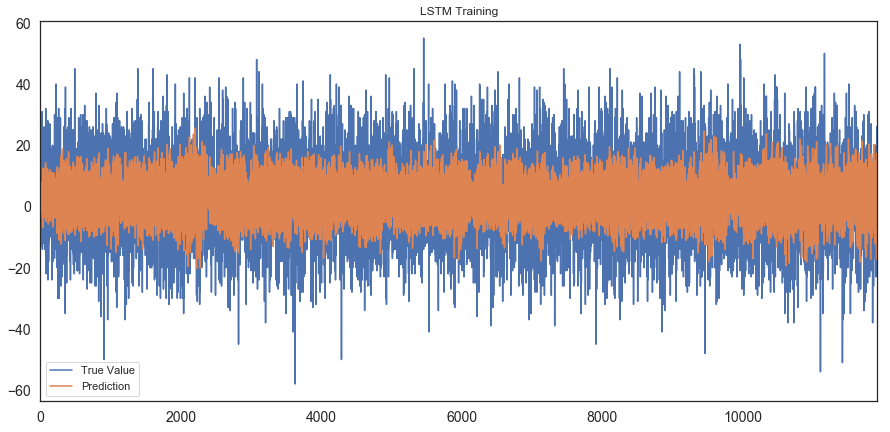

adj train r^2 = 0.21996765508895355
train mse = 135.47217915400927


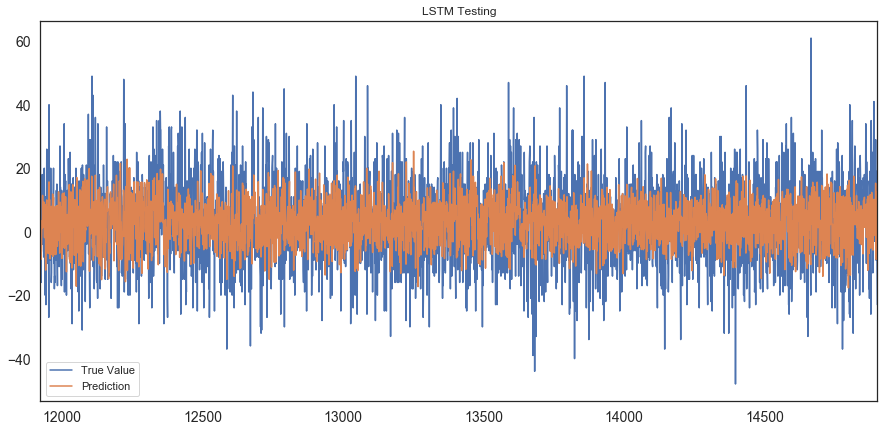

adj test r^2 = 0.19312238496953005
test mse = 153.77182737226056


In [133]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [134]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 52.47%
The testing accuracy is 49.41%


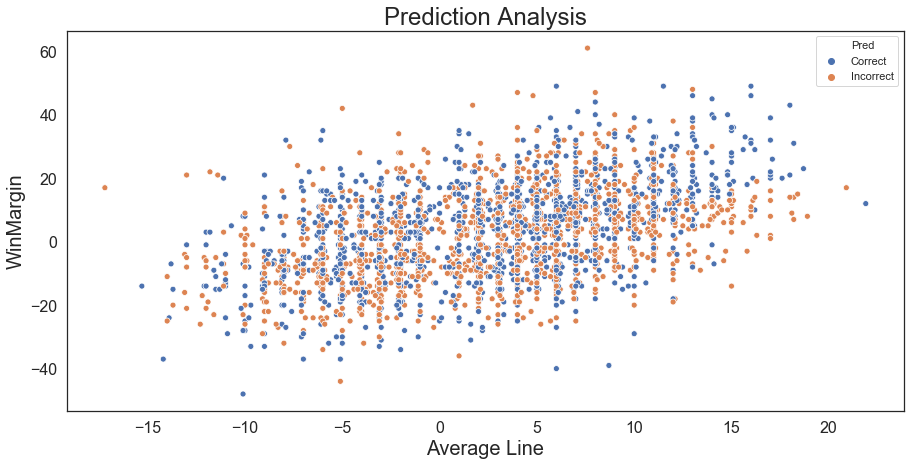

The testing accuracy is 49.41%


In [135]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [137]:
end7 = test_y3['Pred'].values

## TPOT

In [136]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=10, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)



0.5012262666666667 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=0.8, tol=0.0001)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=0.5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

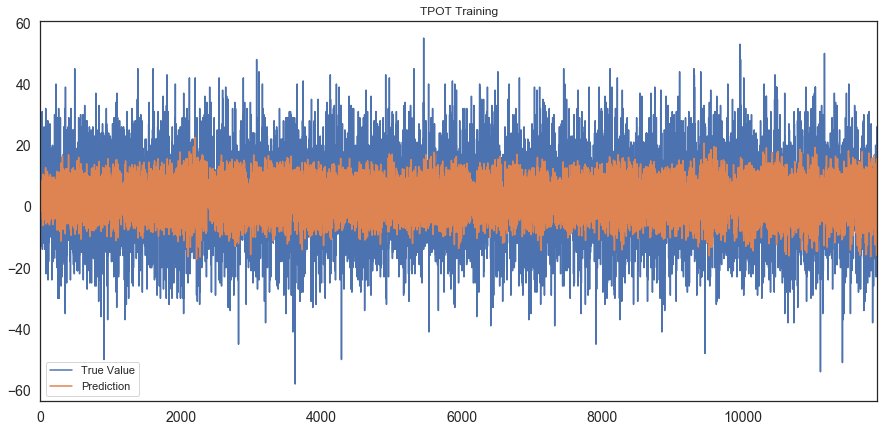

adj train r^2 = 0.2140539624833705
train mse = 136.49924018468568


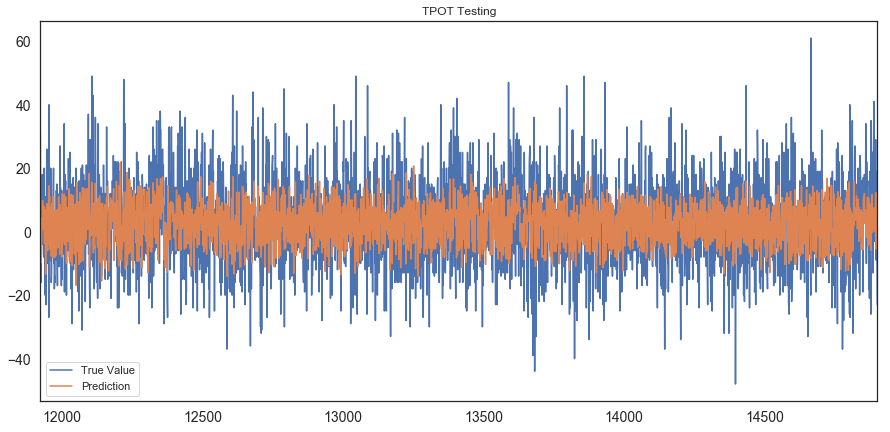

adj test r^2 = 0.20393762119931624
test mse = 151.71069863657976


In [138]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [139]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['average'] = sc3.inverse_transform(train_x['average'])
test_y3['average'] = sc3.inverse_transform(test_x['average'])
train_y3.loc[train_y3['prediction'] > train_y3['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_y3['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_y3['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_y3['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_y3['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_y3['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_y3['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_y3['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 51.34%
The testing accuracy is 49.48%


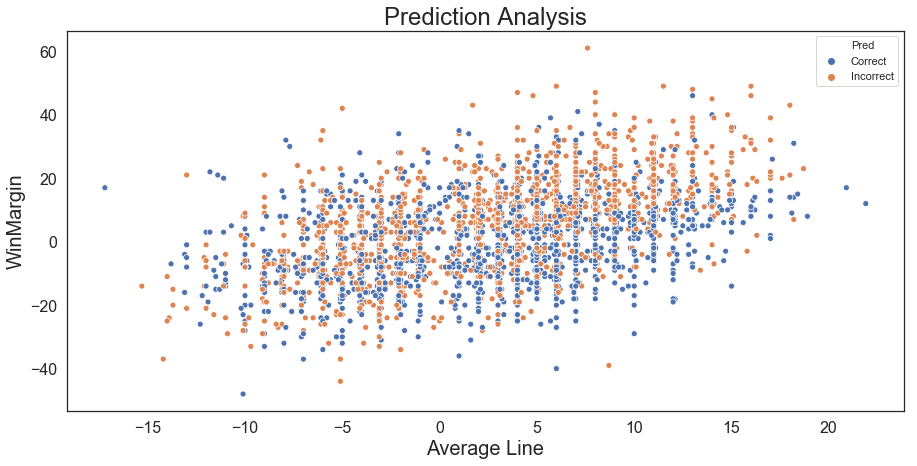

The testing accuracy is 49.48%


In [140]:
test_y3.loc[test_y3['PredOver'] == test_y3['Over'], 'Pred'] = 'Correct'
test_y3.loc[test_y3['PredOver'] != test_y3['Over'], 'Pred'] = 'Incorrect'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="average", y="WinMargin", hue="Pred", data=test_y3)
ax.set_title("Prediction Analysis", fontsize=24)
ax.set_xlabel("Average Line",fontsize=20)
ax.set_ylabel("WinMargin",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

In [141]:
end8 = test_y3['Pred'].values

In [142]:
test_y3.head()

,WinMargin,prediction,average,PredOver,Over,Pred
11922,32.0,-7.287536,-7.9,1.0,1.0,Correct
11923,6.0,3.874276,3.9,0.0,1.0,Incorrect
11924,-6.0,-9.914131,-10.0,1.0,1.0,Correct
11925,-16.0,-7.400357,-7.4,0.0,0.0,Correct
11926,10.0,-6.778158,-7.0,1.0,1.0,Correct


In [143]:
models = test_y3[['WinMargin','average']]
models['linreg'] = end1
models['naive'] = end2
models['extr'] = end3
models['ranfor'] = end4
models['xgb'] = end5
models['nn'] = end6
models['lstm'] = end7
models['tpot'] = end8
models.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,WinMargin,average,linreg,naive,extr,ranfor,xgb,nn,lstm,tpot
11922,32.0,-7.9,Correct,1.0,Correct,Correct,Incorrect,Correct,Correct,Correct
11923,6.0,3.9,Correct,1.0,Incorrect,Incorrect,Correct,Correct,Incorrect,Incorrect
11924,-6.0,-10.0,Incorrect,1.0,Correct,Correct,Correct,Incorrect,Correct,Correct
11925,-16.0,-7.4,Correct,0.0,Incorrect,Incorrect,Incorrect,Incorrect,Incorrect,Correct
11926,10.0,-7.0,Correct,1.0,Incorrect,Incorrect,Correct,Incorrect,Correct,Correct


In [144]:
models.loc[models['naive'] == 0, 'naive'] = 'Correct'
models.loc[models['naive'] == 1, 'naive'] = 'Incorrect'
models.head()

,WinMargin,average,linreg,naive,extr,ranfor,xgb,nn,lstm,tpot
11922,32.0,-7.9,Correct,Incorrect,Correct,Correct,Incorrect,Correct,Correct,Correct
11923,6.0,3.9,Correct,Incorrect,Incorrect,Incorrect,Correct,Correct,Incorrect,Incorrect
11924,-6.0,-10.0,Incorrect,Incorrect,Correct,Correct,Correct,Incorrect,Correct,Correct
11925,-16.0,-7.4,Correct,Correct,Incorrect,Incorrect,Incorrect,Incorrect,Incorrect,Correct
11926,10.0,-7.0,Correct,Incorrect,Incorrect,Incorrect,Correct,Incorrect,Correct,Correct


In [152]:
models = models.replace('Correct', 1)
models = models.replace('Incorrect', 0)
models.head()

,WinMargin,average,linreg,naive,extr,ranfor,xgb,nn,lstm,tpot
11922,32.0,-7.9,1,0,1,1,0,1,1,1
11923,6.0,3.9,1,0,0,0,1,1,0,0
11924,-6.0,-10.0,0,0,1,1,1,0,1,1
11925,-16.0,-7.4,1,1,0,0,0,0,0,1
11926,10.0,-7.0,1,0,0,0,1,0,1,1


In [154]:
models.reset_index()
models.to_csv('modelpreds.csv',index=False)

In [158]:
cols = models.columns
for col in cols:
    print(col + ": " +(str(100*len(models[models[col] == 1])/len(models))))

WinMargin: 2.0798389802079837
average: 1.677289500167729
linreg: 50.08386447500838
naive: 50.18450184501845
extr: 48.104662864810464
ranfor: 48.97685340489768
xgb: 49.781952364978196
nn: 50.352230795035226
lstm: 49.4129486749413
tpot: 49.480040254948
